### Experiment 4: Multiple processes, non-uniform lags

In [1]:
import sys
sys.path.append("../")
import numpy as np
import matplotlib.pyplot as plt
from GraphDataset import GraphDataset, MultiGraphDataset
from creditlearning import CreditLearner

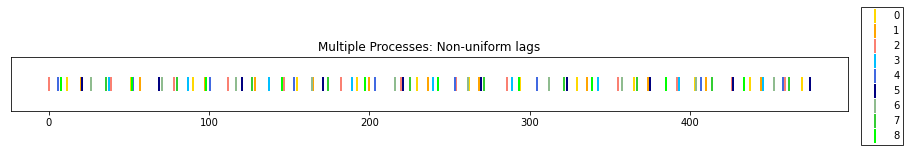

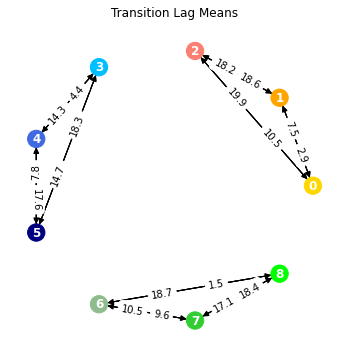

In [70]:
np.random.seed(50)

dt = 0.01

colourList = [['gold','orange','salmon'],
              ['deepskyblue','royalblue','navy'],
              ['darkseagreen','limegreen','lime']]

def dist(x,i):
    if i==0:
        return np.array([0.05,0.75,0.2])
    elif i==1:
        return np.array([0.2,0.05,0.75])
    elif i==2:
        return np.array([0.75,0.2,0.05])
    
def dist2(x,i):
    if i==0:
        return np.array([0,1,0])
    elif i==1:
        return np.array([0,0,1])
    elif i==2:
        return np.array([1,0,0])
    


mean_scale = 20
var_scale = 2

multigraph1 = MultiGraphDataset(numNodesList=[3,3,3],
                                pList=[1,1,1],
                                scaleList=[(mean_scale,var_scale),(mean_scale,var_scale),
                                           (mean_scale,var_scale)],
                                uniformTime=0,
                                #dist=lambda x,i:np.random.power(0.5,x),
                                dist=dist2,
                                uniformTransitions=False,
                                dt=dt,colourList=colourList,
                                labelList=None)




multigraph1.generateEvents([500,500,500],offsets=[0,10*np.random.rand(),20*np.random.rand()],cutoff=dt,minTime=False,minSeparation=10*dt)
trainIndex = int(0.2*len(multigraph1.events))
multigraph1.plotEvents(start=0,end=100,
                       title=r'Multiple Processes: Non-uniform lags',
                       savefig=True,figname='figs_for_paper/experiment4/processStream.png')

#multigraph1.plotGraphs((4,4),withProbs=0)
# smallestInterval = np.min(multigraph1.times[1:] - multigraph1.times[:-1])
# print("Smallest interval = ",smallestInterval)
# largestInterval = np.max(multigraph1.times[1:] - multigraph1.times[:-1])
# print("Largest interval = ",largestInterval)


#multigraph1.plotComposedGraph((10,10),withProbs=True,title='Transition Probabilities',savefig=True,figname='figs_for_paper/experiment4/processGraph.png')
multigraph1.plotComposedGraph((6,6),withProbs=False,title='Transition Lag Means',savefig=True,figname='figs_for_paper/experiment4/processGraphTime.png')



In [77]:
clgraph = CreditLearner(tau_min=0.01,tau_max=180,num_taustars=200,
                        delta_min=0.1,delta_max=80,k=8,dt=dt,
                        num_stimuli=multigraph1.totalNodes,
                        lrM=1,lrC=1,gradientClip=5,stimuli_labels=multigraph1.labels)
clgraph.prelearnM(f=multigraph1.eventsOneHot[:,trainIndex:],
                  event_times=multigraph1.timeInds[trainIndex:])
clgraph.learnCreditFast(f=multigraph1.eventsOneHot[:,trainIndex:],
                        event_times=multigraph1.timeInds[trainIndex:],
                        suppressM=True,adaptlr=True,verbose=500)

Reached event:  0 / 997
Reached event:  500 / 997


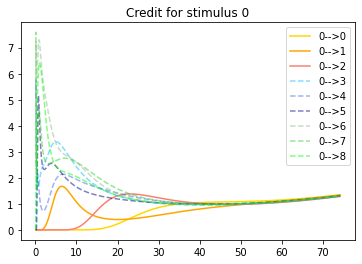

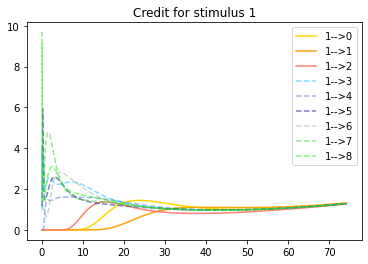

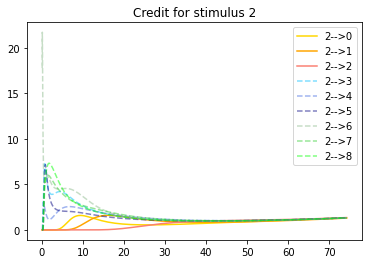

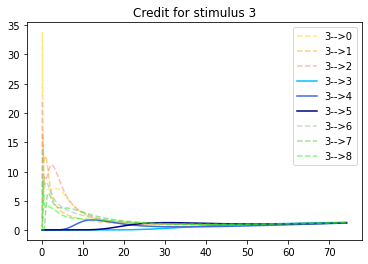

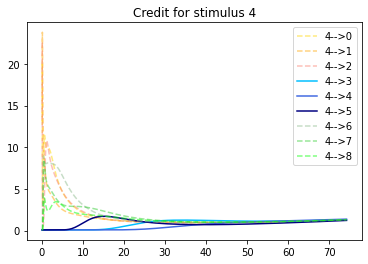

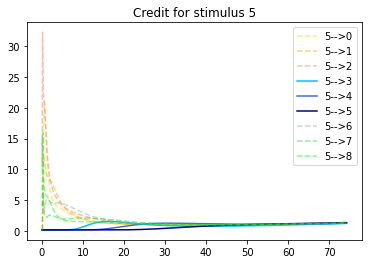

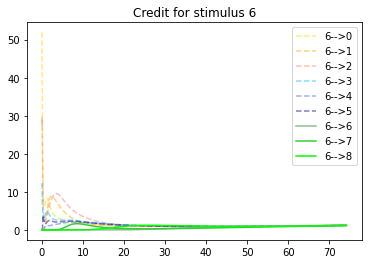

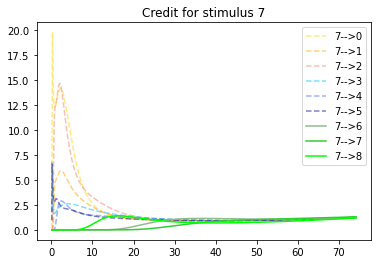

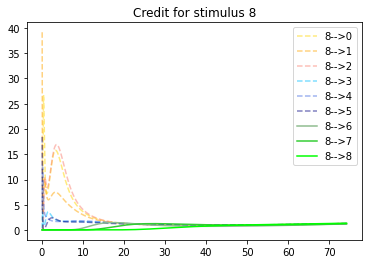

In [79]:
clgraph.plotCredit(scalebymax=0,colours=multigraph1.colours,savefig=False,process_labels=[0,0,0,1,1,1,2,2,2],prefix="figs_for_paper/experiment4/")



In [78]:
accuracy, accuracyM, perplexity, perplexityM = clgraph.predictOnSequence(f=multigraph1.eventsOneHot[:,:trainIndex],
                                        event_times=multigraph1.timeInds[:trainIndex],
                                        withMprediction=True, verbose=0,returnPredictions=False)

print("Perplexity C = ", perplexity)
print("Perplexity M = ", perplexityM)


Accuracy C :  0.7459677419354839
Accuracy M :  0.22580645161290322
Baseline probability :  0.13709677419354838
Perplexity C =  2.104586393103841
Perplexity M =  8.374833926685557


Reconstructed Graph for C
Number of edges =  4


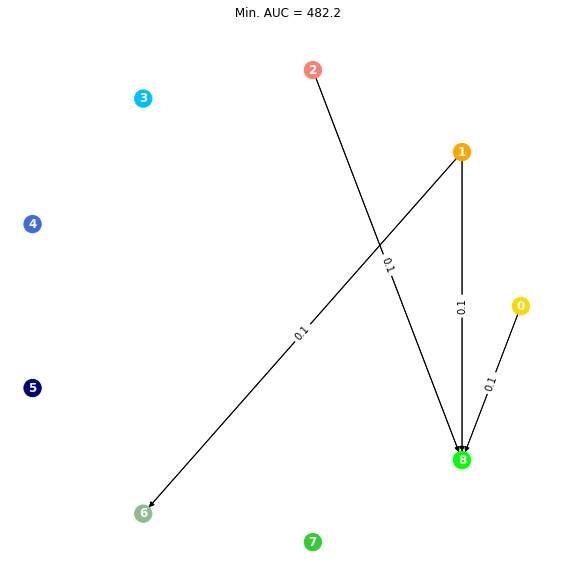

Reconstructed Graph for M
Number of edges =  22


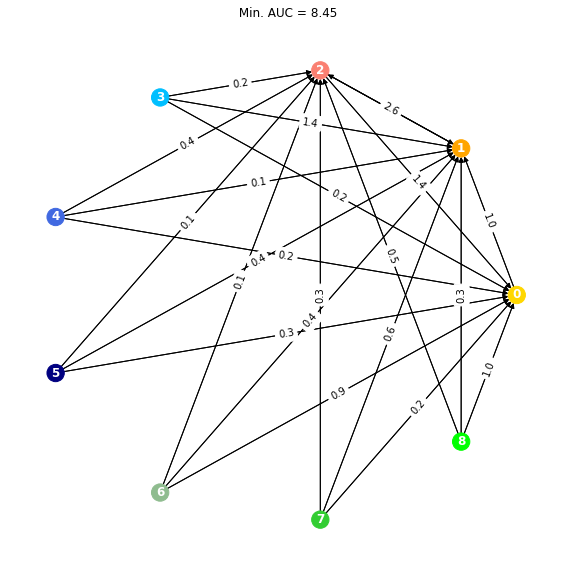

In [47]:
print("Reconstructed Graph for C")
clgraph.graphCredit(CorM='C',thresh_pct=0.8,colours=multigraph1.colours,figsize=(10,10),thickness_factor=1,usearea=1,savefig=True,prefix="figs_for_paper/experiment4/")
print("Reconstructed Graph for M")
clgraph.graphCredit(CorM='M',thresh_pct=0.96,colours=multigraph1.colours,figsize=(10,10),thickness_factor=1,savefig=False,prefix="figs_for_paper/experiment4/")